In [5]:
import os
import glob
import h5py
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import scanpy as sc

import matplotlib.pyplot as plt
plt.rcParams["pdf.use14corefonts"] = True

from splotch.utils import savagedickey

In [14]:
### REPLACE with path to AnnData downloaded from GCP ###
data_dir = '/Users/adaly/Documents/mouse_colon/csplotch_anndata'
adata_betas = sc.read_h5ad(os.path.join(data_dir, 'adata_csplotch_mroi_betas.h5ad'))
adata_cell_betas = sc.read_h5ad(os.path.join(data_dir, 'adata_csplotch_celltype_betas.h5ad'))
adata_lambdas = sc.read_h5ad(os.path.join(data_dir, 'adata_csplotch_lambdas.h5ad'))

### Fig 3g: posteriors over expression of region-specific marker genes

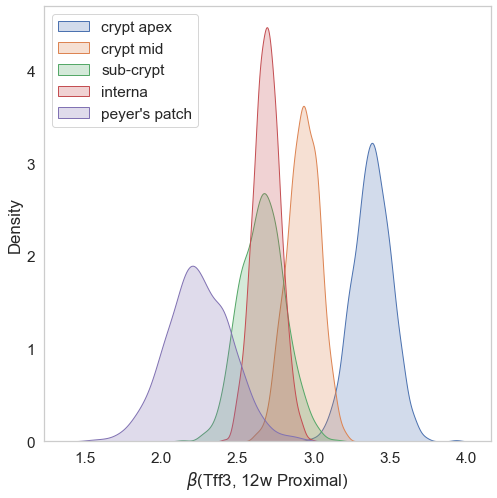

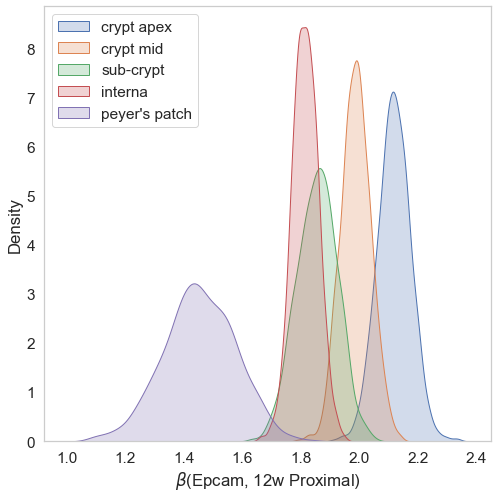

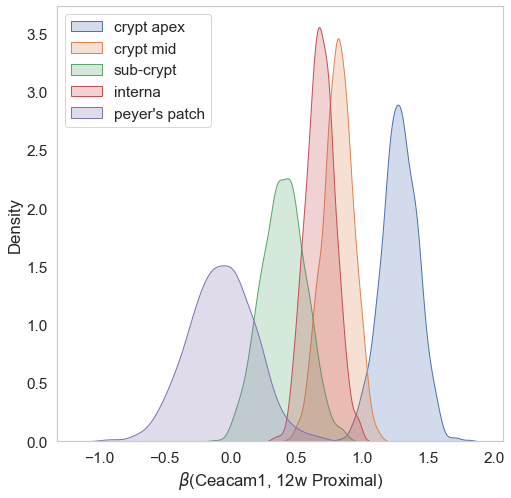

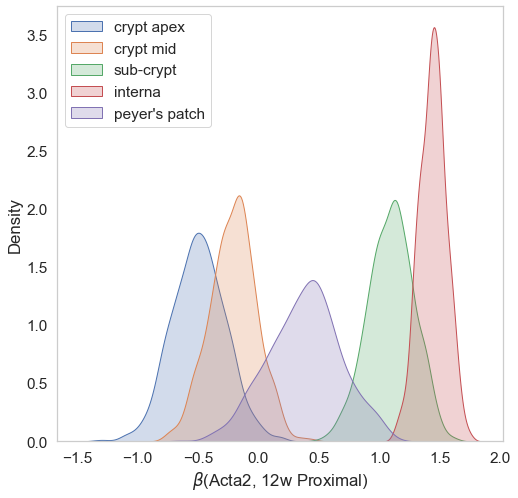

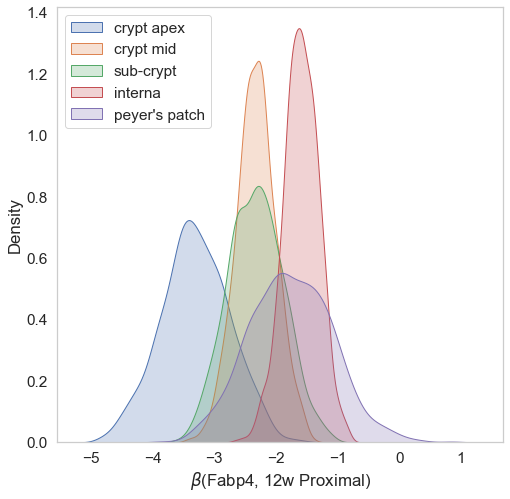

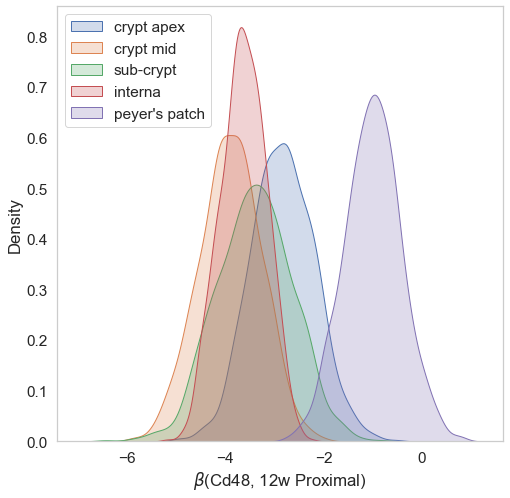

In [10]:
def plot_select_aars(gene, age, reg, 
                     aars=['crypt apex', 'crypt mid', 'sub-crypt', 'interna', "peyer's patch"]):
    sns.set(font_scale=1.4)
    sns.set_style("whitegrid")

    fig, ax = plt.subplots(1, figsize=(8,8))

    for aar in aars:
        cond = '%s BL6WT.%s' % (age, reg)
            
        inds = np.logical_and(adata_betas.obs.condition==cond, 
                              adata_betas.obs.annotation==aar)
        mu = adata_betas[inds, gene].X.squeeze()
        sigma = adata_betas[inds, gene].layers['X_stds'].squeeze()

        d = np.random.normal(loc=mu, scale=sigma, size=1000)
        sns.kdeplot(d, fill=True, ax=ax, label=aar)

    ax.set_xlabel(r'$\beta$(%s, %s %s)' % (gene, age, reg))
    ax.grid(False)
    plt.legend(bbox_to_anchor=[0.0, 1.0], loc='upper left')
    
    return fig, ax

plot_select_aars('Tff3', '12w', 'Proximal')
plt.show()

plot_select_aars('Epcam', '12w', 'Proximal')
plt.show()

plot_select_aars('Ceacam1', '12w', 'Proximal')
plt.show()

plot_select_aars('Acta2', '12w', 'Proximal')
plt.show()

plot_select_aars('Fabp4', '12w', 'Proximal')
plt.show()

plot_select_aars('Cd48', '12w', 'Proximal')
plt.show()

### Fig3j: posteriors over expression of cell type marker genes

In [13]:
sntypes = ['B', 'T', 'Fibroblast', 'Glia', 'Lymphatic', 'Macrophage', 'Mesothelial', 'Neuron', 'Vascular', 
           'SMC', 'Cycling', 'Enteroendocrine', 'Goblet', 'Stem', 'TA', 'Tuft', 'Colonocyte']
colors = [(0.9921568627450981, 0.814640522875817, 0.6336024605920799, 1.0), 
          (0.9914186851211073, 0.550726643598616, 0.23277201076509035, 1.0), 
          (0.9088350634371396, 0.9649826989619378, 0.8910265282583621, 1.0), 
          (0.8163783160322953, 0.9281199538638985, 0.7913264129181085, 1.0), 
          (0.6950711264898117, 0.8778008458285275, 0.6698654363706267, 1.0), 
          (0.5573241061130334, 0.8164244521337947, 0.546958861976163, 1.0), 
          (0.3952941176470588, 0.7394079200307574, 0.43352556708958095, 1.0), 
          (0.2378316032295272, 0.6523798539023453, 0.3510495963091119, 1.0), 
          (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0), 
          (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0), 
          (0.9369319492502883, 0.9291195693963861, 0.9606305267204921, 1.0), 
          (0.8539792387543252, 0.8540099961553248, 0.9211072664359861, 1.0), 
          (0.7358708189158016, 0.7395617070357555, 0.8618223760092273, 1.0), 
          (0.617762399077278, 0.6021376393694733, 0.7834525182622069, 1.0), 
          (0.5002691272587466, 0.4868127643214148, 0.7276432141484044, 1.0), 
          (0.4136562860438293, 0.3137716262975778, 0.6373702422145329, 1.0), 
          (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]
color_map = pd.Series(data=colors, index=sntypes)

In [15]:
adata_lambdas

AnnData object with n_obs × n_vars = 66481 × 12976
    obs: 'Age', 'Region', 'Sex', 'annotation', 'x', 'y', 'TA', 'SMC', 'Neuron', 'Mesothelial', 'Fibroblast', 'Cycling', 'Stem', 'Glia', 'Colonocyte', 'Vascular', 'Enteroendocrine', 'Tuft', 'T', 'Macrophage', 'Lymphatic', 'Goblet', 'B'
    var: 'ENSEMBL', 'mean', 'std'
    uns: 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

['Fibroblast', 'Macrophage', 'Mesothelial', 'Vascular', 'Cycling', 'Enteroendocrine', 'Goblet', 'Stem', 'TA', 'Tuft', 'Colonocyte']


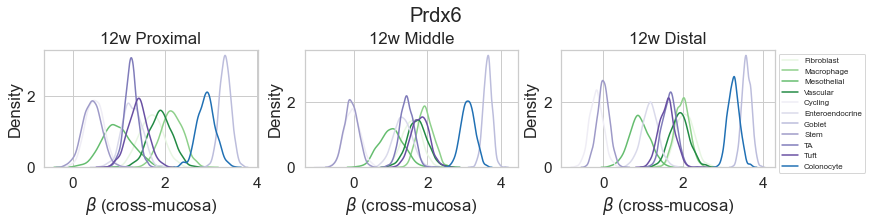

['Fibroblast', 'Macrophage', 'Mesothelial', 'Vascular', 'Cycling', 'Enteroendocrine', 'Goblet', 'Stem', 'TA', 'Tuft', 'Colonocyte']


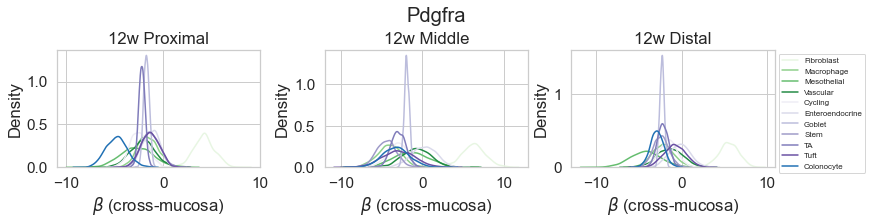

['B', 'T', 'Macrophage', 'Goblet']


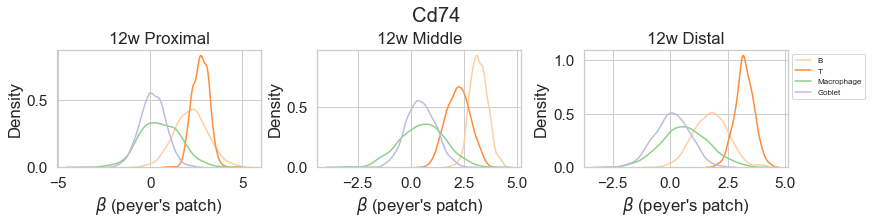

In [32]:
def plot_betas_regions(aar, age, thresh=0.05, figsize=(12,3)):
    fig, ax = plt.subplots(1, 3, figsize=figsize, constrained_layout=True)
    
    # Find cell types that are present at a rate of "thresh" or greater in specified region/time
    df_obs = adata_lambdas.obs[adata_lambdas.obs.Age == age]
    df_obs = df_obs[df_obs.annotation == aar]
    abundant_ctypes = [ct for ct in sntypes if df_obs[ct].mean() > thresh]
    
    print(abundant_ctypes)
        
    for i, region in enumerate(['Proximal', 'Middle', 'Distal']):
        cond = '%s BL6WT.%s' % (age, region)        
        inds = np.logical_and(adata_cell_betas.obs.condition==cond, 
                              adata_cell_betas.obs.annotation==aar)

        # Posterior distributions over cell-specific expression in niche:
        for k, ct in enumerate(abundant_ctypes):
            inds_c = np.logical_and(adata_cell_betas.obs.celltype==ct, inds)
            
            mu = adata_cell_betas[inds_c, g].X.squeeze()
            sigma = adata_cell_betas[inds_c, g].layers['X_stds'].squeeze()
                        
            d = np.random.normal(loc=mu, scale=sigma, size=1000)            
            cval = colors[sntypes.index(ct)]
            sns.kdeplot(d, label=ct, ax=ax[i], color=cval, fill=False)
            
        ax[i].set_title(age + ' ' + region)
        ax[i].set_xlabel(r'$\beta$ (%s)' % aar)
    
    plt.suptitle(g)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.0), fontsize=8)

    return fig, ax

fig3_genes_aars = [('Prdx6', 'cross-mucosa'), ('Pdgfra', 'cross-mucosa'), ('Cd74', "peyer's patch")]

for g, aar in fig3_genes_aars:
    plot_betas_regions(aar, '12w', thresh=0.02)
    plt.show()